In [2]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras import regularizers
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:

# mount Google Drive

# specify the path to the image folder on Google Drive
train_data_dir ='/kaggle/input/ethiopian-note-currency-dataset/Ethiopian_Currency/train'
test_data_dir='/kaggle/input/ethiopian-note-currency-dataset/Ethiopian_Currency/test'
# specify the size of the input images and the batch size
image_size = (256, 256)
batch_size = 128


In [4]:
# create an instance of the ImageDataGenerator class for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Random rotation between 0 and 20 degrees
    width_shift_range=0.1,  # Random shift along the width axis between 0 and 10%
    height_shift_range=0.1, # Random shift along the height axis between 0 and 10%
    zoom_range=0.2,         # Random zoom between 0.8 and 1.2
    horizontal_flip=True,   # Random horizontal flip
    vertical_flip=True,     # Random vertical flip
    fill_mode='nearest'
   
)
test_datagen=ImageDataGenerator()
# use the flow_from_directory method to load the images from the specified directory

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

val_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
   
   
)


Found 1544 images belonging to 11 classes.
Found 375 images belonging to 11 classes.


In [5]:

# define the architecture of the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3),))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu',))
model.add(Dropout(0.3))
model.add(Dense(11, activation='softmax' ))


In [6]:

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
# compile the model
model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])



In [7]:
checkpoint = ModelCheckpoint('/kaggle/working/model.h5', monitor='val_loss', save_best_only=True)
# train the model
history = model.fit(
    train_generator,
    epochs=85,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

Epoch 1/85
13/13 [==============================] - 191s 14s/step - loss: 2.4249 - accuracy: 0.0829 - val_loss: 2.3814 - val_accuracy: 0.0960
Epoch 2/85
13/13 [==============================] - 184s 14s/step - loss: 2.3846 - accuracy: 0.0959 - val_loss: 2.3753 - val_accuracy: 0.1360
Epoch 3/85
13/13 [==============================] - 178s 14s/step - loss: 2.3687 - accuracy: 0.1146 - val_loss: 2.3208 - val_accuracy: 0.1387
Epoch 4/85
13/13 [==============================] - 181s 14s/step - loss: 2.2849 - accuracy: 0.1561 - val_loss: 2.1851 - val_accuracy: 0.2187
Epoch 5/85
13/13 [==============================] - 176s 13s/step - loss: 2.1806 - accuracy: 0.1898 - val_loss: 2.0542 - val_accuracy: 0.2373
Epoch 6/85
13/13 [==============================] - 176s 13s/step - loss: 2.0217 - accuracy: 0.2325 - val_loss: 1.9692 - val_accuracy: 0.2507
Epoch 7/85
13/13 [==============================] - 183s 14s/step - loss: 1.9871 - accuracy: 0.2306 - val_loss: 2.0543 - val_accuracy: 0.2293
Epoch 

In [8]:
model.save('/kaggle/working/my_model.h5')
model.save('/kaggle/working/my_model.keras')

# evaluate the performance of the model on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f'Validation loss: {loss:.4f}')
print(f'Validation accuracy: {accuracy:.4f}')
# use the model to make predictions on new images

3/3 [==============================] - 16s 5s/step - loss: 0.3493 - accuracy: 0.8747
Validation loss: 0.3493
Validation accuracy: 0.8747


In [12]:
import tensorflow as tf
# Load your trained CNN model
model = tf.keras.models.load_model('model.h5')
# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the converted model to a file
with open('/kaggle/working/my_cnn_model.tflite', 'wb') as f:
  f.write(tflite_model)

KeyboardInterrupt: 

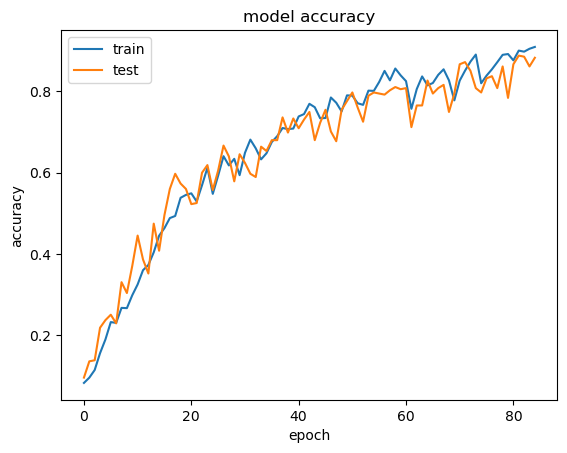

In [10]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


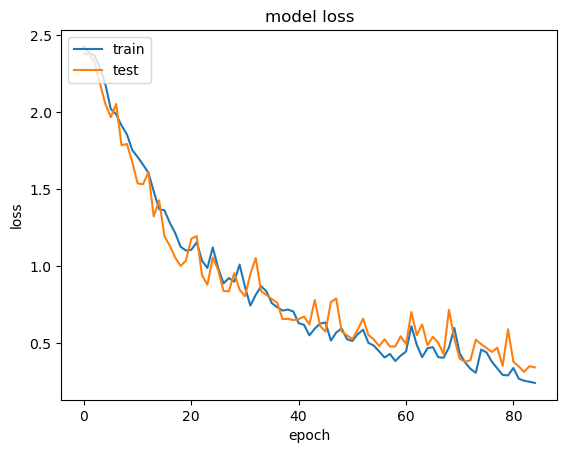

In [11]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()